# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [22]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather ['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | mossel bay
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | chongwe
Processing Record 6 of Set 1 | ujae
Processing Record 7 of Set 1 | atbasar
Processing Record 8 of Set 1 | ketchikan
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | floro
Processing Record 13 of Set 1 | waingapu
Processing Record 14 of Set 1 | mantenopolis
Processing Record 15 of Set 1 | port-vila
Processing Record 16 of Set 1 | arteche
Processing Record 17 of Set 1 | makinsk
Processing Record 18 of Set 1 | khandyga
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 22 of Set 1 | namie


In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
                             

# Show Record Count
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,32.97,48,21,6.15,US,1726775230
1,mossel bay,-34.1831,22.1460,10.96,72,100,7.64,ZA,1726775231
2,port mathurin,-19.6833,63.4167,21.96,84,12,7.11,MU,1726775232
3,olonkinbyen,70.9221,-8.7187,1.39,74,100,10.69,SJ,1726775233
4,chongwe,-15.3292,28.6820,24.32,22,0,1.43,ZM,1726775234
...,...,...,...,...,...,...,...,...,...
557,sussex,41.1834,-74.6663,27.27,55,0,3.09,US,1726775895
558,sturgis,41.7992,-85.4192,29.82,36,0,2.57,US,1726775729
559,sandnessjoen,66.0217,12.6316,11.06,93,75,3.60,NO,1726775898
560,newman,37.3138,-121.0208,27.81,46,87,2.24,US,1726775899


In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,32.97,48,21,6.15,US,1726775230
1,mossel bay,-34.1831,22.1460,10.96,72,100,7.64,ZA,1726775231
2,port mathurin,-19.6833,63.4167,21.96,84,12,7.11,MU,1726775232
3,olonkinbyen,70.9221,-8.7187,1.39,74,100,10.69,SJ,1726775233
4,chongwe,-15.3292,28.6820,24.32,22,0,1.43,ZM,1726775234


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,32.97,48,21,6.15,US,1726775230
1,mossel bay,-34.1831,22.1460,10.96,72,100,7.64,ZA,1726775231
2,port mathurin,-19.6833,63.4167,21.96,84,12,7.11,MU,1726775232
3,olonkinbyen,70.9221,-8.7187,1.39,74,100,10.69,SJ,1726775233
4,chongwe,-15.3292,28.6820,24.32,22,0,1.43,ZM,1726775234


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

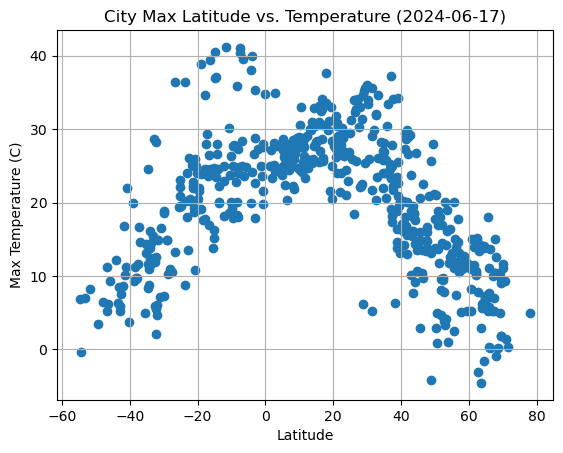

In [34]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

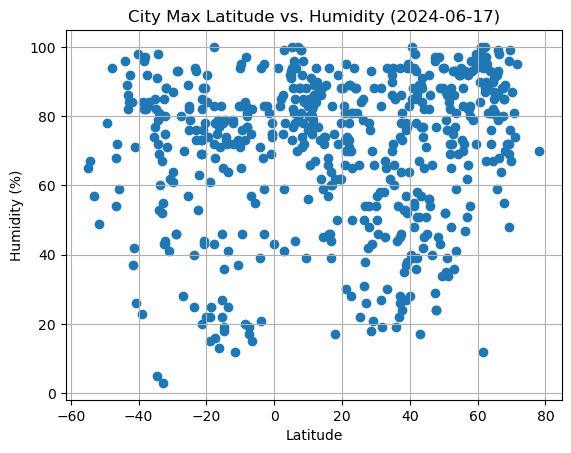

In [36]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2024-06-17)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

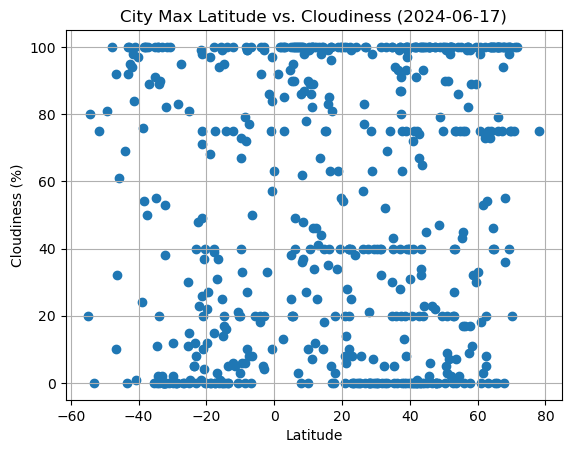

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2024-06-17)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

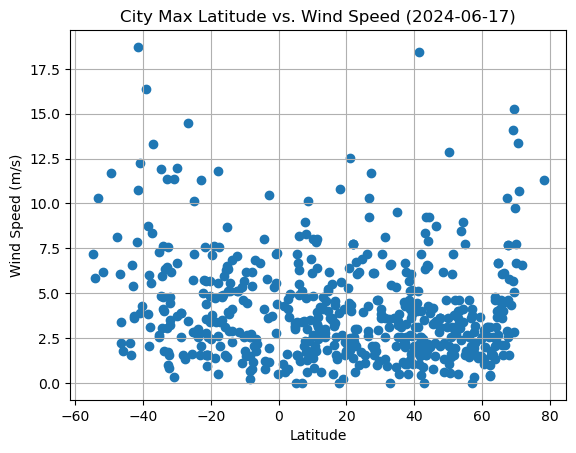

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2024-06-17)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [68]:
# Define a function to create Linear Regression plots
def weather_regression(x, y, title, text_coordinates):
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)

    regression_value = x*slope+intercept
    equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x, y)
    
    plt.plot(x, regression_value, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.annotate(equation, text_coordinates, color='red', fontsize=15)
    plt.title(f'Latitude vs. {title}')
    print(f'r^2-value:{r_value**2}')
    plt.show()

In [82]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,32.97,48,21,6.15,US,1726775230
3,olonkinbyen,70.9221,-8.7187,1.39,74,100,10.69,SJ,1726775233
5,ujae,8.9322,165.7642,28.61,72,87,2.31,MH,1726775235
6,atbasar,51.8000,68.3333,9.58,69,100,3.77,KZ,1726775236
7,ketchikan,55.3422,-131.6461,11.99,73,43,1.76,US,1726775237


In [83]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mossel bay,-34.1831,22.1460,10.96,72,100,7.64,ZA,1726775231
2,port mathurin,-19.6833,63.4167,21.96,84,12,7.11,MU,1726775232
4,chongwe,-15.3292,28.6820,24.32,22,0,1.43,ZM,1726775234
8,grytviken,-54.2811,-36.5092,-0.42,67,80,5.86,GS,1726775238
10,waitangi,-43.9535,-176.5597,12.12,96,69,2.24,NZ,1726775295


###  Temperature vs. Latitude Linear Regression Plot

r^2-value:0.6030848158035511


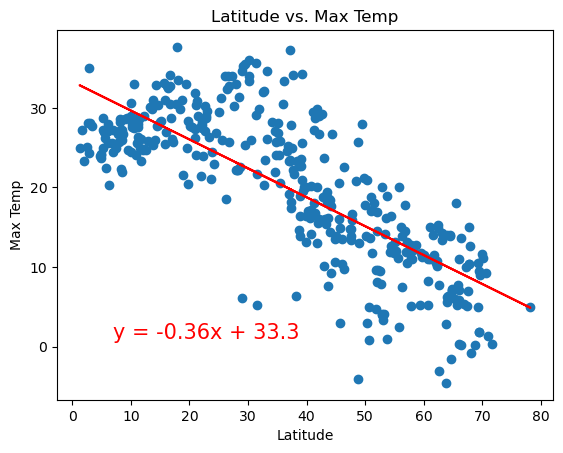

In [85]:
# Linear regression on Northern Hemisphere
weather_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp",(7,1))

r^2-value:0.5219393276025855


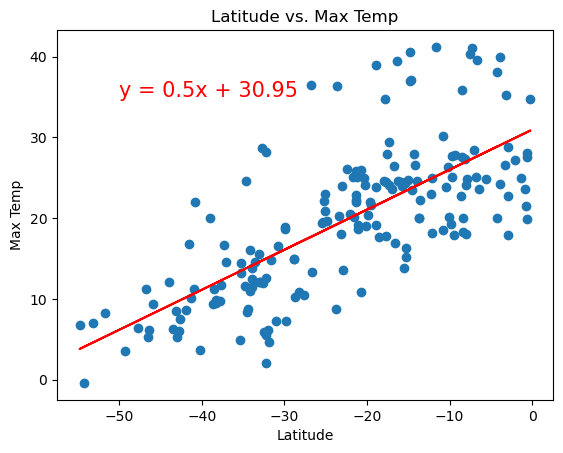

In [96]:
# Linear regression on Southern Hemisphere
weather_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp",(-50,35))

**Discussion about the linear relationship:** In the Northern Hemisphere, temperatures decrease as latitude increases, while in the Southern Hemisphere, temperatures rise as latitude increases. This reflects the general trend that areas closer to the equator are warmer, while higher latitudes experience cooler climates.

### Humidity vs. Latitude Linear Regression Plot

r^2-value:0.0015550189245640462


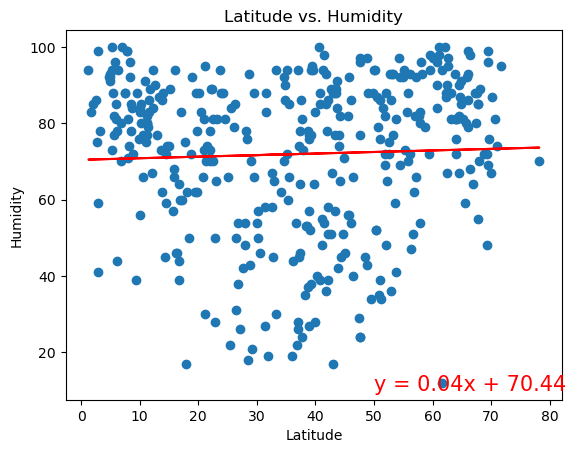

In [87]:
# Northern Hemisphere
weather_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity",(50,10))

r^2-value:0.012174424056529526


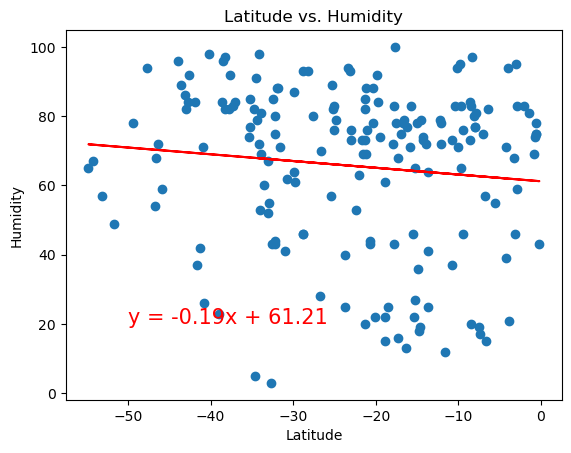

In [89]:
# Southern Hemisphere
weather_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity",(-50,20))

**Discussion about the linear relationship:** In the northern hemisphere, the humidity very slightly increases with the latitude, and in the southern hemisphere, it slightly decreases with the latitude. In conclusion, latitude has almost no significant effect on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

r^2-value:0.00017596963309476817


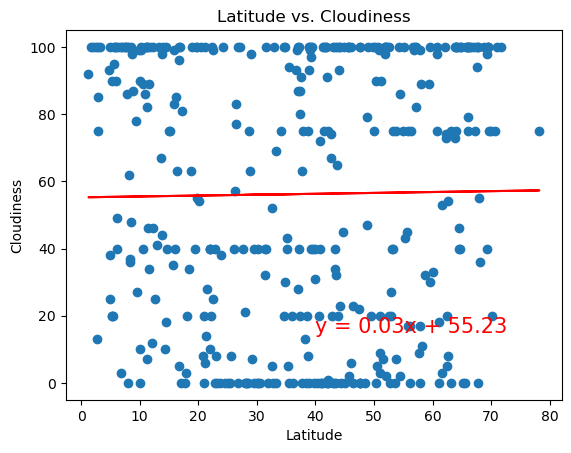

In [90]:
# Northern Hemisphere
weather_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness",(40,15))

r^2-value:0.01434301996918933


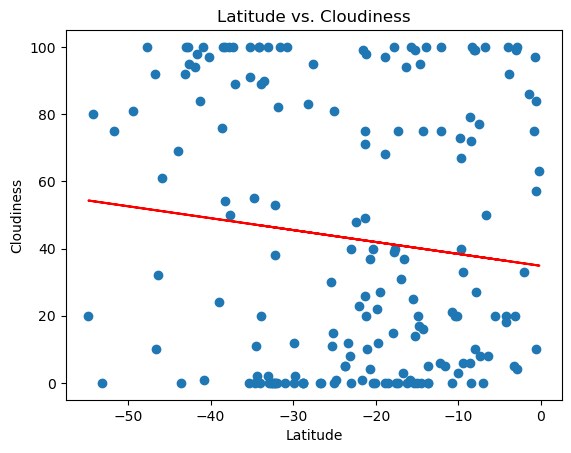

In [92]:
# Southern Hemisphere
weather_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness",(40,15))

**Discussion about the linear relationship:** Latitude weakly influences cloudiness in both hemispheres, with a slight increase in the north and a slight decrease in the south, but neither is a strong predictor.

### Wind Speed vs. Latitude Linear Regression Plot

r^2-value:0.0039993314134068965


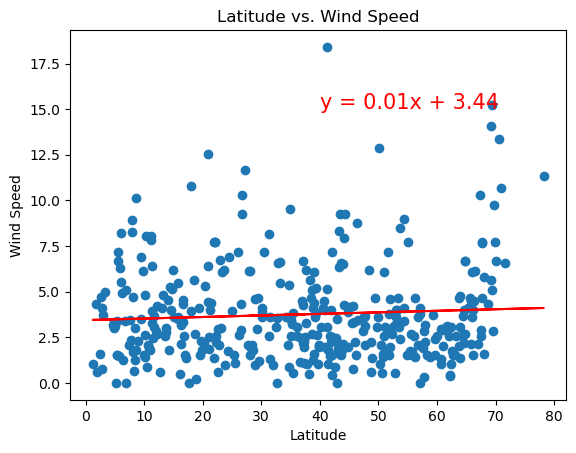

In [94]:
# Northern Hemisphere
weather_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed",(40,15))

r^2-value:0.07586763181239131


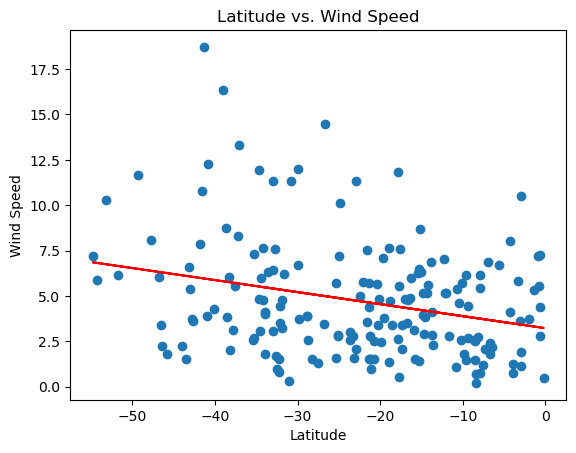

In [95]:
# Southern Hemisphere
weather_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed",(40,15))

**Discussion about the linear relationship:** The linear relationship between latitude and wind speed is weak in both hemispheres. The northern hemisphere has a slightly more positive correlation, and the southern hemisphere has a somewhat more negative correlation.